### Построение графовой нейронной сети для детекции CPD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import networkx as nx

import pickle

%config InlineBackend.figure_format = 'retina'


import os
import pickle
from tqdm import tqdm

In [2]:
returns = pd.read_csv("returns_crypto.csv")

### HCGNN

In [3]:
from Graph_module import GraphBuilder,GraphAnalysis
from HCGNN_module import ChangePointDetector

/opt/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:250: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [4]:
# загрузка и чтение уже готовых графов
graph_load = GraphAnalysis()
path = 'graphs_entropy'
te_graphs_files = [file for file in os.listdir(path) if file.endswith('.pkl')]

graphs, laplacian_stats = graph_load.load_graphs_and_laplacian_stats(te_graphs_files,path)


**Результат подбора гиперпараметров**

In [123]:
returns = pd.read_csv("returns_crypto.csv")
returns.iloc[:,1:].columns

Index(['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'XRP-USD', 'DOGE-USD',
       'ADA-USD', 'TRX-USD', 'LINK-USD', 'BCH-USD', 'LTC-USD', 'ETC-USD',
       'FIL-USD', 'XMR-USD', 'XLM-USD', 'MKR-USD', 'THETA-USD', 'KCS-USD',
       'AGIX-USD', 'NEO-USD', 'GNO-USD', 'XTZ-USD', 'NEXO-USD', 'EOS-USD',
       'SNX-USD', 'MANA-USD', 'BTG-USD', 'XDC-USD', 'IOTX-USD', 'TUSD-USD',
       'GLM-USD', 'ANT-USD', 'ZIL-USD', 'ZEC-USD', 'ZRX-USD', 'ENJ-USD',
       'ABT-USD', 'RVN-USD', 'TRAC-USD', 'SC-USD', 'ELF-USD', 'QTUM-USD',
       'BAT-USD', 'LRC-USD', 'DASH-USD', 'DCR-USD', 'GAS-USD', 'Date'],
      dtype='object')

100%|██████████| 50/50 [00:36<00:00,  1.36it/s]


Best Parameters: {'hidden_channels': 8, 'lr': 0.01, 'num_epochs': 50}
Best Validation Loss: 0.35498717427253723


100%|██████████| 50/50 [00:36<00:00,  1.36it/s]


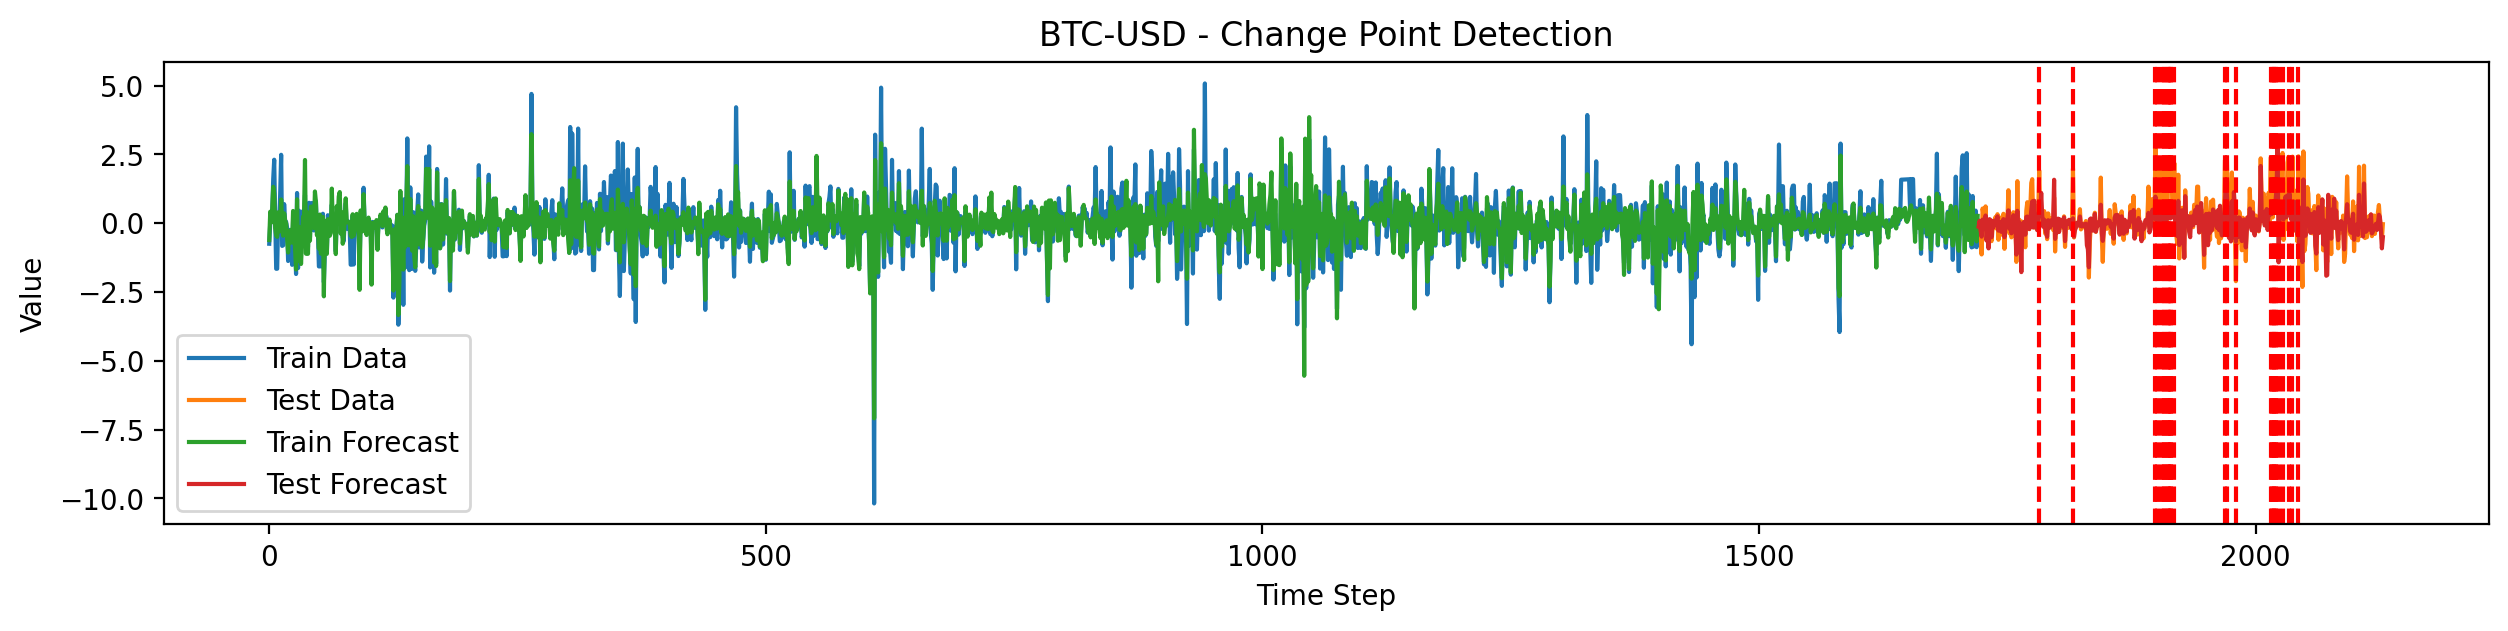

In [94]:
# поиск гиперпараметров для модели
detector = ChangePointDetector('returns_crypto.csv')

# Определение диапазонов гиперпараметров
param_grid = {
    'hidden_channels': [8, 16, 32, 64],
    'lr': [0.001, 0.01, 0.1],
    'num_epochs': [10, 20, 50]
}

# Выполнение случайного поиска
best_params, best_loss = detector.random_search(param_grid, n_iter=20)
print(f"Best Parameters: {best_params}")
print(f"Best Validation Loss: {best_loss}")

# Обучение модели с наилучшими гиперпараметрами
detector.hidden_channels = best_params['hidden_channels']
detector.lr = best_params['lr']
detector.num_epochs = best_params['num_epochs']
detector.train_model()
change_points, residuals_list = detector.detect_change_points()
detector.plot_individual_series(change_points, 'BTC-USD')

##### Граф на основе трансфертной энтропии

Training Model:   2%|▏         | 1/50 [00:00<00:33,  1.44it/s]

Epoch 000, Loss: 0.5444


Training Model:   4%|▍         | 2/50 [00:01<00:31,  1.52it/s]

Epoch 001, Loss: 0.5433


Training Model:   6%|▌         | 3/50 [00:01<00:31,  1.51it/s]

Epoch 002, Loss: 0.5430


Training Model:   8%|▊         | 4/50 [00:02<00:29,  1.54it/s]

Epoch 003, Loss: 0.5431


Training Model:  10%|█         | 5/50 [00:03<00:28,  1.56it/s]

Epoch 004, Loss: 0.5429


Training Model:  12%|█▏        | 6/50 [00:03<00:27,  1.58it/s]

Epoch 005, Loss: 0.5427


Training Model:  14%|█▍        | 7/50 [00:04<00:27,  1.58it/s]

Epoch 006, Loss: 0.5427


Training Model:  16%|█▌        | 8/50 [00:05<00:26,  1.60it/s]

Epoch 007, Loss: 0.5426


Training Model:  18%|█▊        | 9/50 [00:05<00:25,  1.59it/s]

Epoch 008, Loss: 0.5424


Training Model:  20%|██        | 10/50 [00:06<00:25,  1.58it/s]

Epoch 009, Loss: 0.5422


Training Model:  22%|██▏       | 11/50 [00:06<00:24,  1.60it/s]

Epoch 010, Loss: 0.5425


Training Model:  24%|██▍       | 12/50 [00:07<00:23,  1.61it/s]

Epoch 011, Loss: 0.5430


Training Model:  26%|██▌       | 13/50 [00:08<00:22,  1.61it/s]

Epoch 012, Loss: 0.5421


Training Model:  28%|██▊       | 14/50 [00:08<00:22,  1.62it/s]

Epoch 013, Loss: 0.5430


Training Model:  30%|███       | 15/50 [00:09<00:21,  1.61it/s]

Epoch 014, Loss: 0.5421


Training Model:  32%|███▏      | 16/50 [00:10<00:20,  1.62it/s]

Epoch 015, Loss: 0.5422


Training Model:  34%|███▍      | 17/50 [00:10<00:20,  1.61it/s]

Epoch 016, Loss: 0.5422


Training Model:  36%|███▌      | 18/50 [00:11<00:19,  1.61it/s]

Epoch 017, Loss: 0.5422


Training Model:  38%|███▊      | 19/50 [00:11<00:19,  1.61it/s]

Epoch 018, Loss: 0.5420


Training Model:  40%|████      | 20/50 [00:12<00:18,  1.62it/s]

Epoch 019, Loss: 0.5421


Training Model:  42%|████▏     | 21/50 [00:13<00:17,  1.62it/s]

Epoch 020, Loss: 0.5420


Training Model:  44%|████▍     | 22/50 [00:13<00:17,  1.62it/s]

Epoch 021, Loss: 0.5420


Training Model:  46%|████▌     | 23/50 [00:14<00:16,  1.62it/s]

Epoch 022, Loss: 0.5420


Training Model:  48%|████▊     | 24/50 [00:15<00:16,  1.61it/s]

Epoch 023, Loss: 0.5421


Training Model:  50%|█████     | 25/50 [00:15<00:15,  1.61it/s]

Epoch 024, Loss: 0.5420


Training Model:  52%|█████▏    | 26/50 [00:16<00:15,  1.60it/s]

Epoch 025, Loss: 0.5420


Training Model:  54%|█████▍    | 27/50 [00:16<00:14,  1.55it/s]

Epoch 026, Loss: 0.5420


Training Model:  56%|█████▌    | 28/50 [00:17<00:14,  1.56it/s]

Epoch 027, Loss: 0.5419


Training Model:  58%|█████▊    | 29/50 [00:18<00:13,  1.58it/s]

Epoch 028, Loss: 0.5419


Training Model:  60%|██████    | 30/50 [00:18<00:12,  1.59it/s]

Epoch 029, Loss: 0.5418


Training Model:  62%|██████▏   | 31/50 [00:19<00:11,  1.60it/s]

Epoch 030, Loss: 0.5417


Training Model:  64%|██████▍   | 32/50 [00:20<00:11,  1.60it/s]

Epoch 031, Loss: 0.5418


Training Model:  66%|██████▌   | 33/50 [00:20<00:10,  1.60it/s]

Epoch 032, Loss: 0.5418


Training Model:  68%|██████▊   | 34/50 [00:21<00:09,  1.60it/s]

Epoch 033, Loss: 0.5418


Training Model:  70%|███████   | 35/50 [00:21<00:09,  1.57it/s]

Epoch 034, Loss: 0.5418


Training Model:  72%|███████▏  | 36/50 [00:22<00:08,  1.59it/s]

Epoch 035, Loss: 0.5418


Training Model:  74%|███████▍  | 37/50 [00:23<00:08,  1.60it/s]

Epoch 036, Loss: 0.5418


Training Model:  76%|███████▌  | 38/50 [00:23<00:07,  1.61it/s]

Epoch 037, Loss: 0.5418


Training Model:  78%|███████▊  | 39/50 [00:24<00:07,  1.57it/s]

Epoch 038, Loss: 0.5418


Training Model:  80%|████████  | 40/50 [00:25<00:06,  1.59it/s]

Epoch 039, Loss: 0.5418


Training Model:  82%|████████▏ | 41/50 [00:25<00:05,  1.60it/s]

Epoch 040, Loss: 0.5418


Training Model:  84%|████████▍ | 42/50 [00:26<00:04,  1.61it/s]

Epoch 041, Loss: 0.5418


Training Model:  86%|████████▌ | 43/50 [00:26<00:04,  1.60it/s]

Epoch 042, Loss: 0.5418


Training Model:  88%|████████▊ | 44/50 [00:27<00:03,  1.61it/s]

Epoch 043, Loss: 0.5418


Training Model:  90%|█████████ | 45/50 [00:28<00:03,  1.61it/s]

Epoch 044, Loss: 0.5418


Training Model:  92%|█████████▏| 46/50 [00:28<00:02,  1.61it/s]

Epoch 045, Loss: 0.5418


Training Model:  94%|█████████▍| 47/50 [00:29<00:01,  1.61it/s]

Epoch 046, Loss: 0.5418


Training Model:  96%|█████████▌| 48/50 [00:30<00:01,  1.60it/s]

Epoch 047, Loss: 0.5418


Training Model:  98%|█████████▊| 49/50 [00:30<00:00,  1.61it/s]

Epoch 048, Loss: 0.5418


Training Model: 100%|██████████| 50/50 [00:31<00:00,  1.60it/s]

Epoch 049, Loss: 0.5418


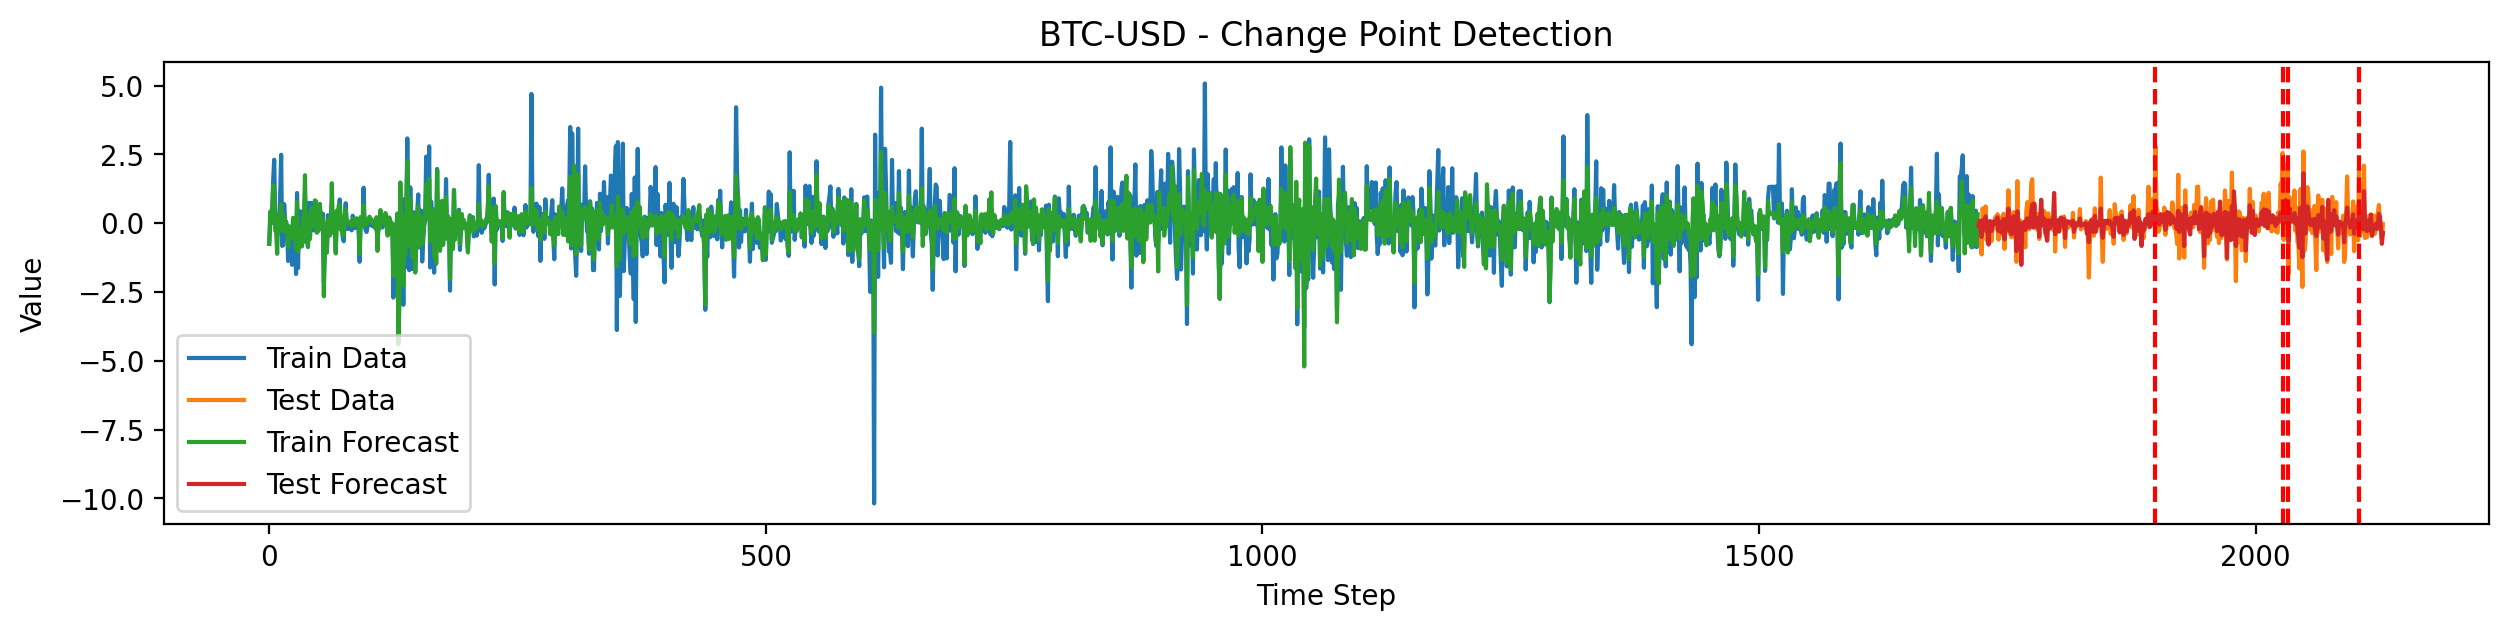

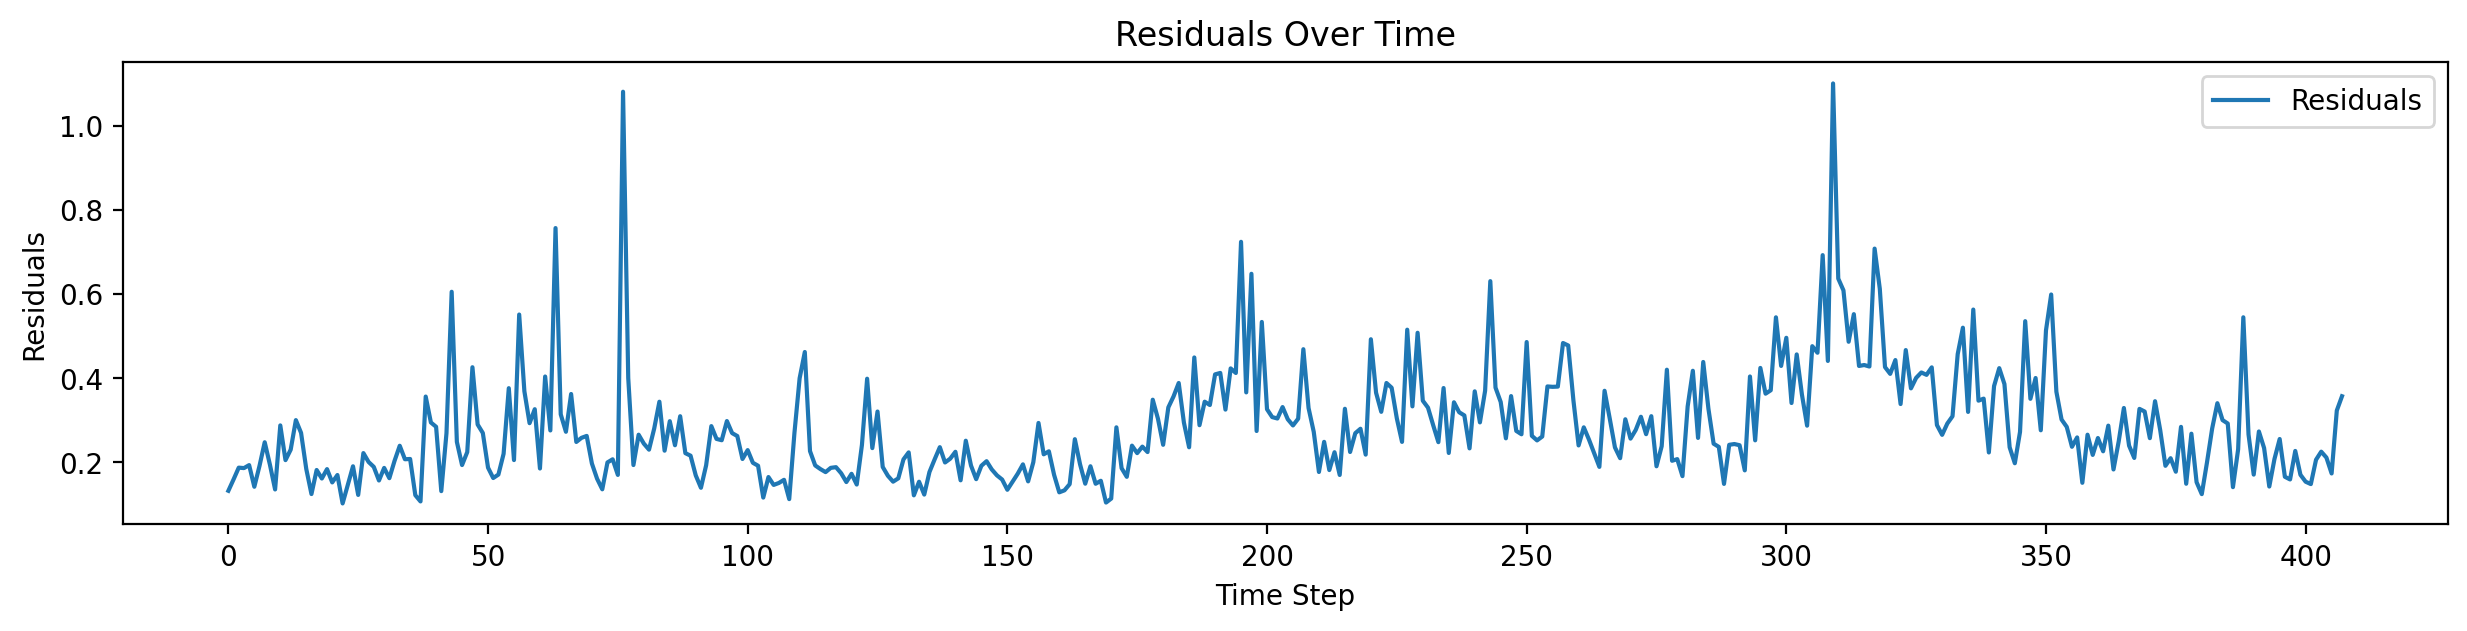

In [122]:
# Пример использования
detector = ChangePointDetector('returns_crypto.csv', graph_type='entropy')
detector.train_model()
change_points, residuals_list = detector.detect_change_points()
detector.plot_individual_series(change_points, 'BTC-USD')
detector.plot_residuals(residuals_list)


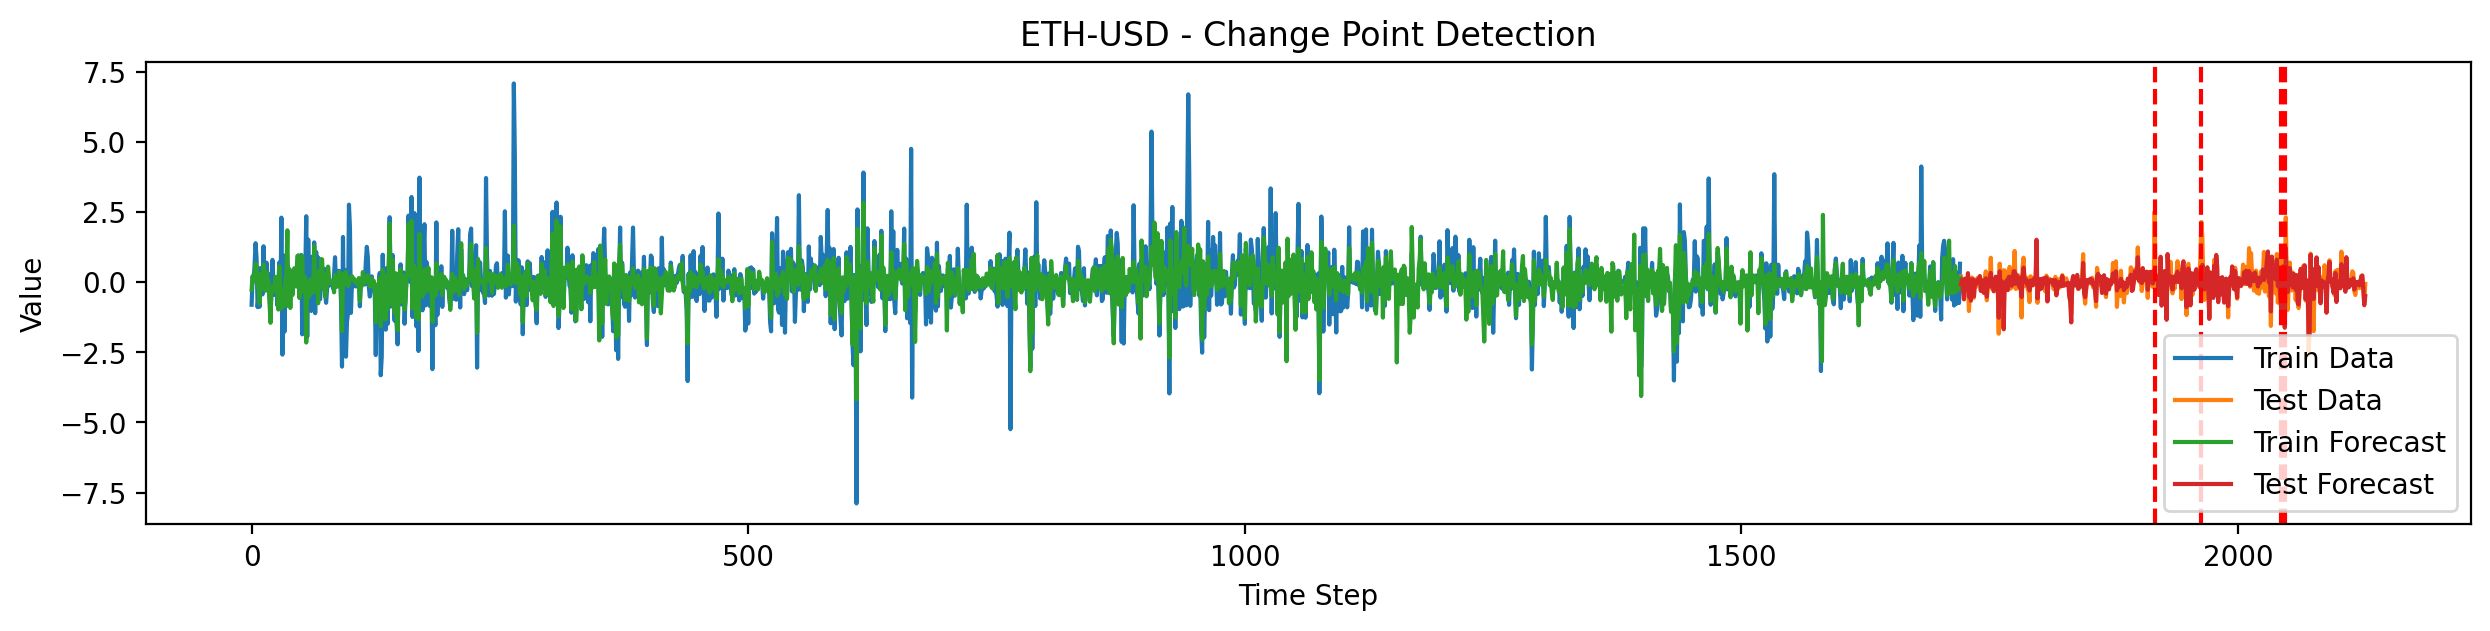

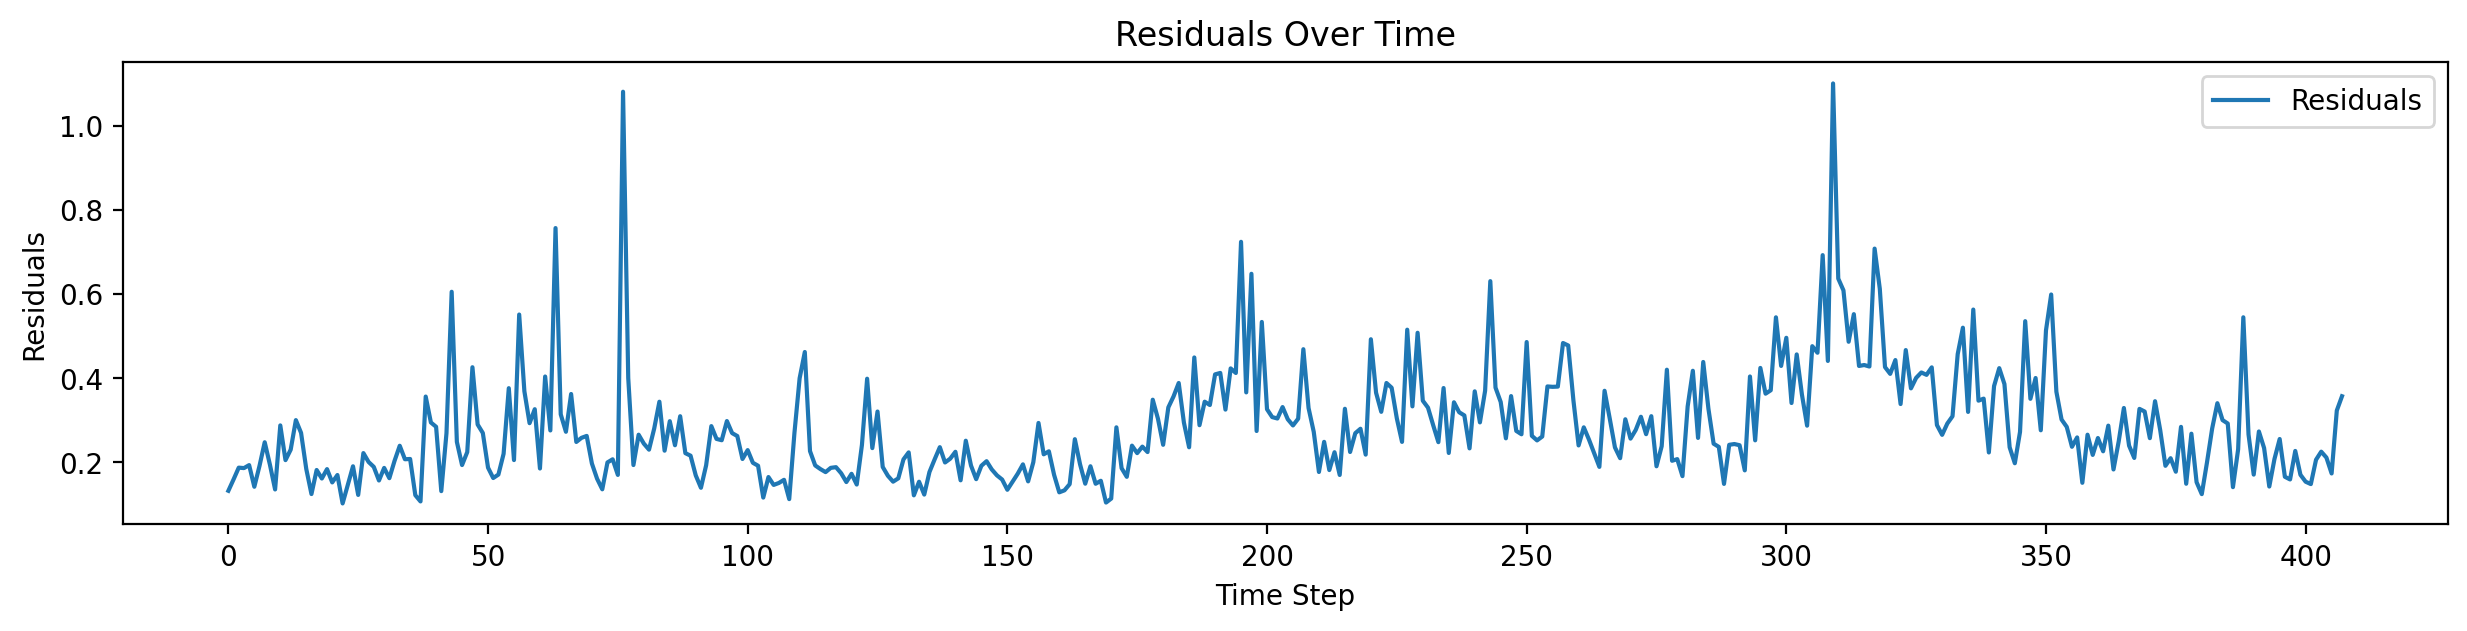

In [124]:
detector.plot_individual_series(change_points, 'ETH-USD')
detector.plot_residuals(residuals_list)


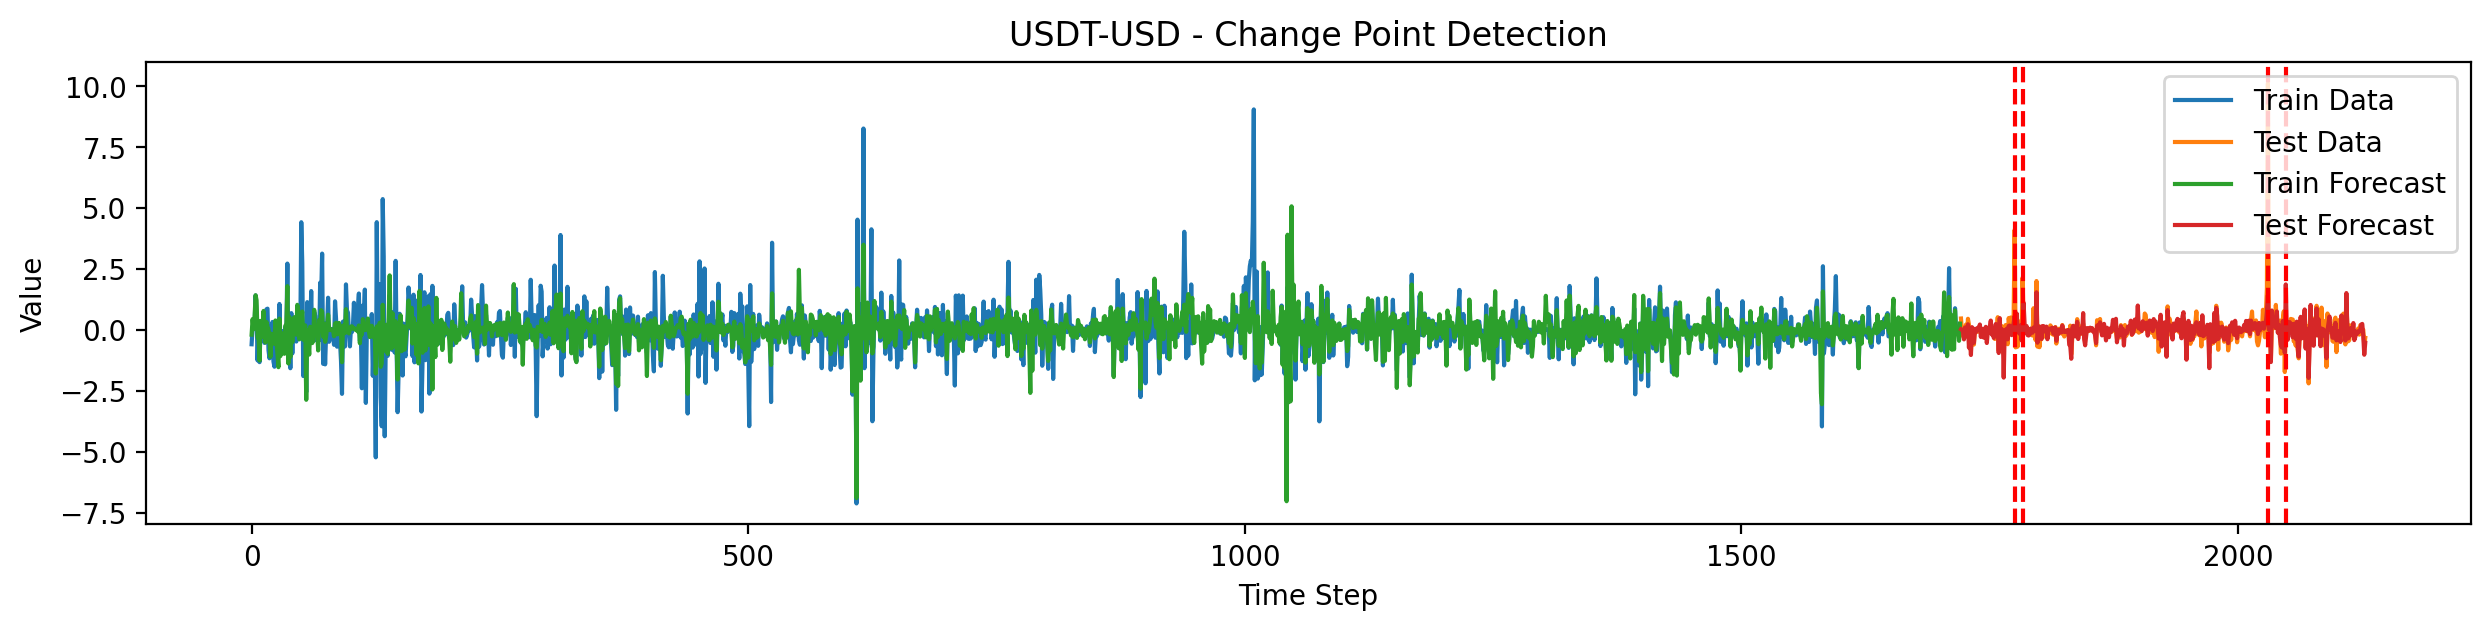

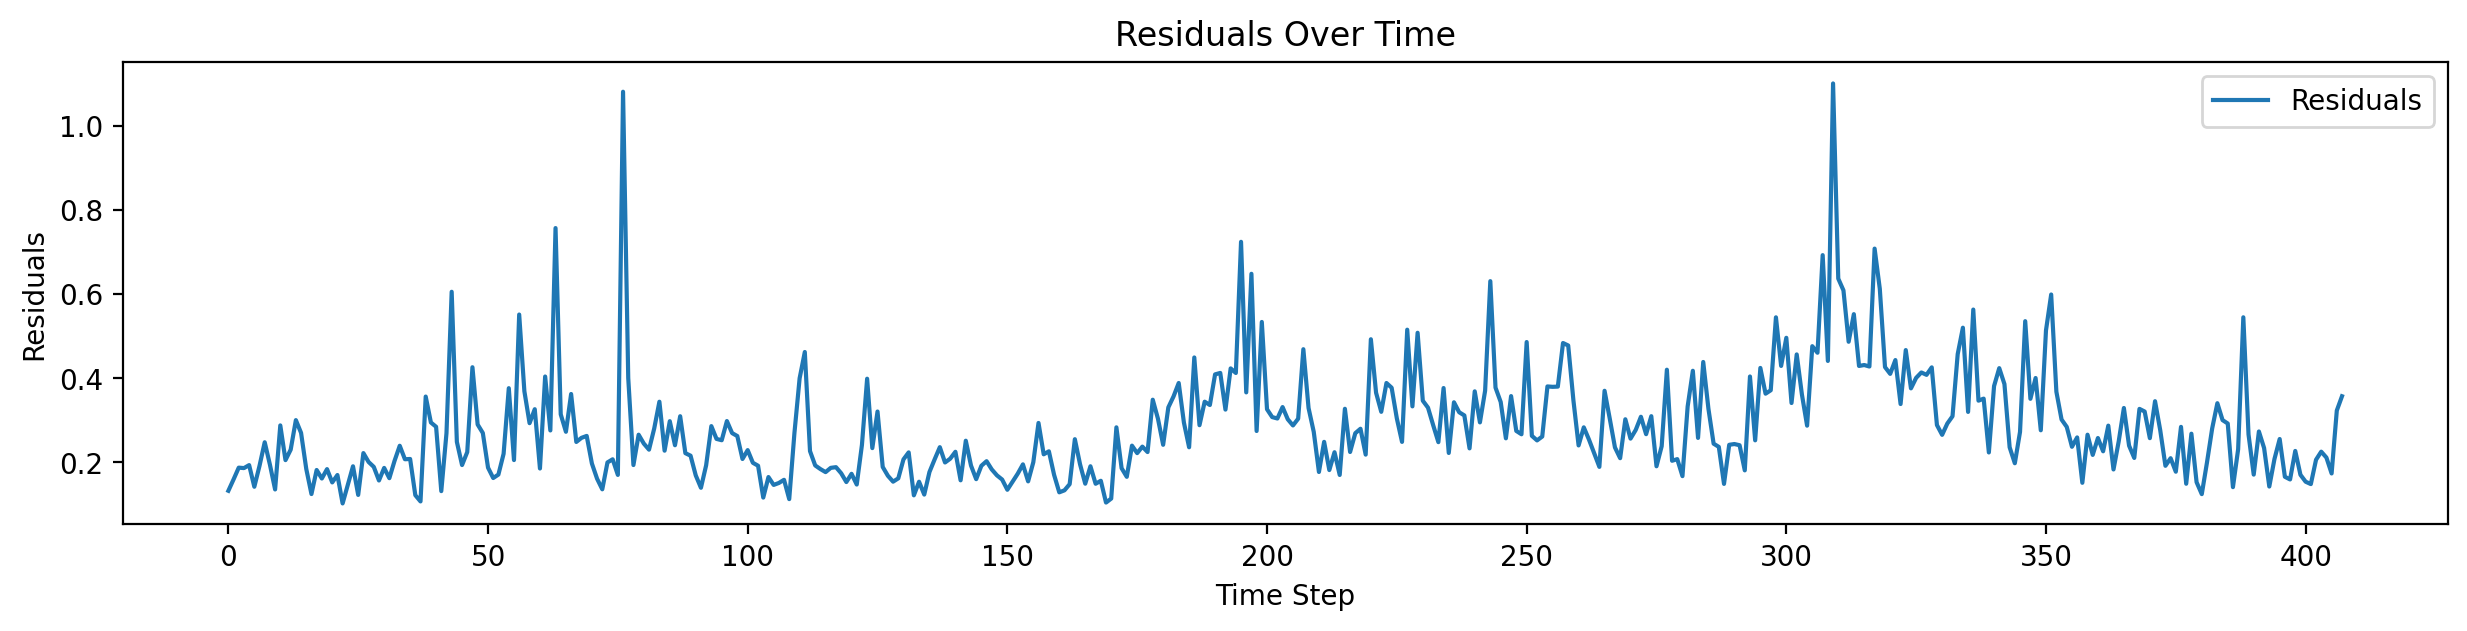

In [125]:
detector.plot_individual_series(change_points, 'USDT-USD')
detector.plot_residuals(residuals_list)


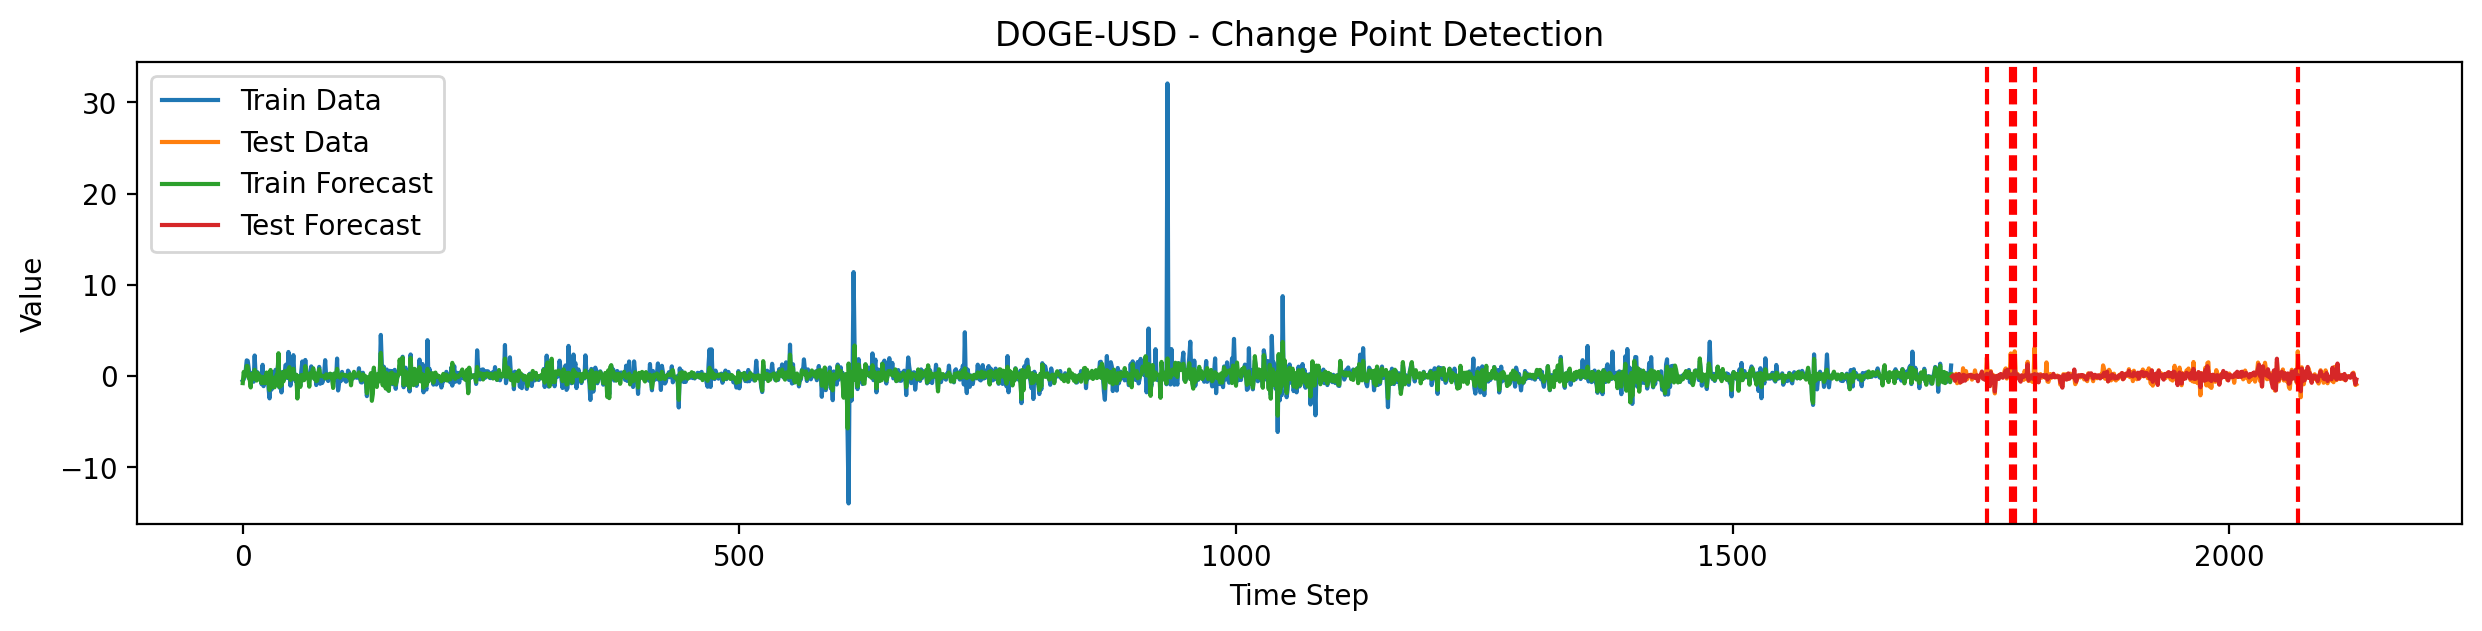

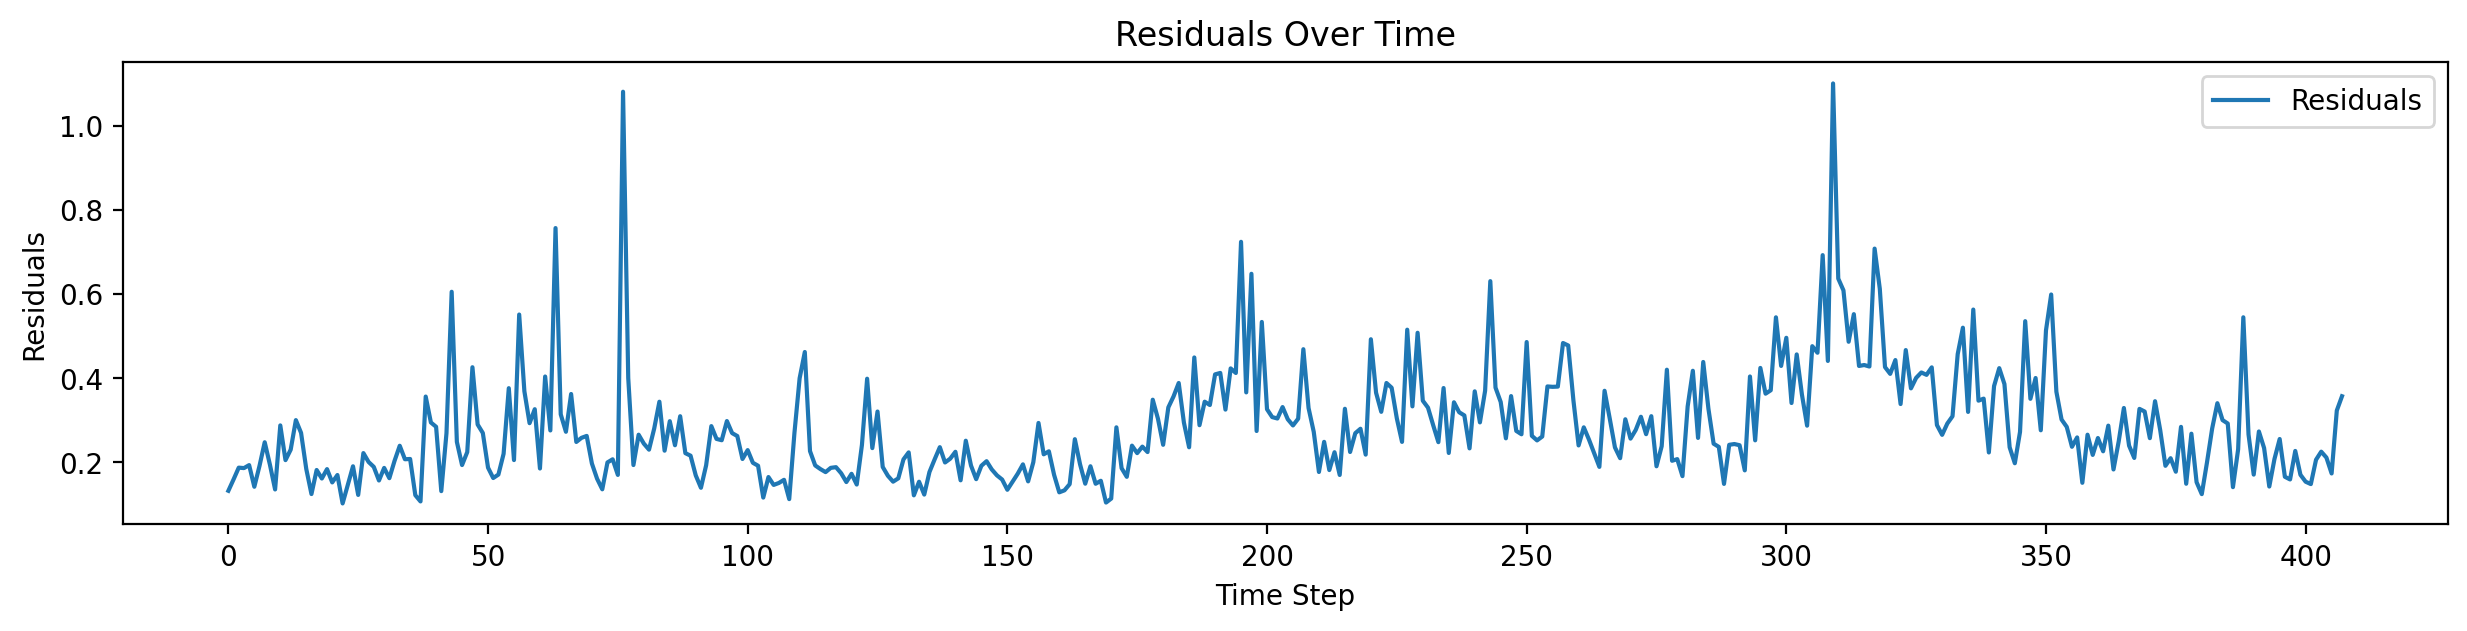

In [126]:
detector.plot_individual_series(change_points, 'DOGE-USD')
detector.plot_residuals(residuals_list)

##### Граф на основе корреляций

Training Model:   2%|▏         | 1/50 [00:00<00:37,  1.30it/s]

Epoch 000, Loss: 0.4092


Training Model:   4%|▍         | 2/50 [00:01<00:35,  1.35it/s]

Epoch 001, Loss: 0.4017


Training Model:   6%|▌         | 3/50 [00:02<00:35,  1.31it/s]

Epoch 002, Loss: 0.4025


Training Model:   8%|▊         | 4/50 [00:03<00:34,  1.32it/s]

Epoch 003, Loss: 0.4017


Training Model:  10%|█         | 5/50 [00:03<00:33,  1.34it/s]

Epoch 004, Loss: 0.4017


Training Model:  12%|█▏        | 6/50 [00:04<00:32,  1.35it/s]

Epoch 005, Loss: 0.4011


Training Model:  14%|█▍        | 7/50 [00:05<00:31,  1.37it/s]

Epoch 006, Loss: 0.4011


Training Model:  16%|█▌        | 8/50 [00:05<00:30,  1.37it/s]

Epoch 007, Loss: 0.4009


Training Model:  18%|█▊        | 9/50 [00:06<00:29,  1.37it/s]

Epoch 008, Loss: 0.4009


Training Model:  20%|██        | 10/50 [00:07<00:29,  1.38it/s]

Epoch 009, Loss: 0.4008


Training Model:  22%|██▏       | 11/50 [00:08<00:28,  1.38it/s]

Epoch 010, Loss: 0.4008


Training Model:  24%|██▍       | 12/50 [00:08<00:27,  1.38it/s]

Epoch 011, Loss: 0.4009


Training Model:  26%|██▌       | 13/50 [00:09<00:27,  1.36it/s]

Epoch 012, Loss: 0.4009


Training Model:  28%|██▊       | 14/50 [00:10<00:26,  1.37it/s]

Epoch 013, Loss: 0.4007


Training Model:  30%|███       | 15/50 [00:11<00:25,  1.38it/s]

Epoch 014, Loss: 0.4007


Training Model:  32%|███▏      | 16/50 [00:11<00:24,  1.37it/s]

Epoch 015, Loss: 0.4007


Training Model:  34%|███▍      | 17/50 [00:12<00:23,  1.38it/s]

Epoch 016, Loss: 0.4007


Training Model:  36%|███▌      | 18/50 [00:13<00:23,  1.38it/s]

Epoch 017, Loss: 0.4007


Training Model:  38%|███▊      | 19/50 [00:13<00:22,  1.38it/s]

Epoch 018, Loss: 0.4007


Training Model:  40%|████      | 20/50 [00:14<00:21,  1.39it/s]

Epoch 019, Loss: 0.4007


Training Model:  42%|████▏     | 21/50 [00:15<00:20,  1.40it/s]

Epoch 020, Loss: 0.4007


Training Model:  44%|████▍     | 22/50 [00:16<00:19,  1.40it/s]

Epoch 021, Loss: 0.4006


Training Model:  46%|████▌     | 23/50 [00:16<00:19,  1.39it/s]

Epoch 022, Loss: 0.4006


Training Model:  48%|████▊     | 24/50 [00:17<00:18,  1.38it/s]

Epoch 023, Loss: 0.4006


Training Model:  50%|█████     | 25/50 [00:18<00:17,  1.39it/s]

Epoch 024, Loss: 0.4006


Training Model:  52%|█████▏    | 26/50 [00:18<00:17,  1.39it/s]

Epoch 025, Loss: 0.4006


Training Model:  54%|█████▍    | 27/50 [00:19<00:16,  1.39it/s]

Epoch 026, Loss: 0.4005


Training Model:  56%|█████▌    | 28/50 [00:20<00:15,  1.39it/s]

Epoch 027, Loss: 0.4006


Training Model:  58%|█████▊    | 29/50 [00:21<00:15,  1.39it/s]

Epoch 028, Loss: 0.4005


Training Model:  60%|██████    | 30/50 [00:21<00:14,  1.39it/s]

Epoch 029, Loss: 0.4005


Training Model:  62%|██████▏   | 31/50 [00:22<00:13,  1.39it/s]

Epoch 030, Loss: 0.4005


Training Model:  64%|██████▍   | 32/50 [00:23<00:12,  1.40it/s]

Epoch 031, Loss: 0.4005


Training Model:  66%|██████▌   | 33/50 [00:23<00:12,  1.38it/s]

Epoch 032, Loss: 0.4005


Training Model:  68%|██████▊   | 34/50 [00:24<00:11,  1.37it/s]

Epoch 033, Loss: 0.4005


Training Model:  70%|███████   | 35/50 [00:25<00:11,  1.35it/s]

Epoch 034, Loss: 0.4005


Training Model:  72%|███████▏  | 36/50 [00:26<00:10,  1.35it/s]

Epoch 035, Loss: 0.4005


Training Model:  74%|███████▍  | 37/50 [00:26<00:09,  1.35it/s]

Epoch 036, Loss: 0.4005


Training Model:  76%|███████▌  | 38/50 [00:27<00:08,  1.36it/s]

Epoch 037, Loss: 0.4005


Training Model:  78%|███████▊  | 39/50 [00:28<00:07,  1.38it/s]

Epoch 038, Loss: 0.4006


Training Model:  80%|████████  | 40/50 [00:29<00:07,  1.38it/s]

Epoch 039, Loss: 0.4005


Training Model:  82%|████████▏ | 41/50 [00:29<00:06,  1.40it/s]

Epoch 040, Loss: 0.4005


Training Model:  84%|████████▍ | 42/50 [00:30<00:05,  1.39it/s]

Epoch 041, Loss: 0.4006


Training Model:  86%|████████▌ | 43/50 [00:31<00:05,  1.40it/s]

Epoch 042, Loss: 0.4006


Training Model:  88%|████████▊ | 44/50 [00:31<00:04,  1.40it/s]

Epoch 043, Loss: 0.4005


Training Model:  90%|█████████ | 45/50 [00:32<00:03,  1.40it/s]

Epoch 044, Loss: 0.4005


Training Model:  92%|█████████▏| 46/50 [00:33<00:02,  1.40it/s]

Epoch 045, Loss: 0.4005


Training Model:  94%|█████████▍| 47/50 [00:34<00:02,  1.39it/s]

Epoch 046, Loss: 0.4005


Training Model:  96%|█████████▌| 48/50 [00:34<00:01,  1.40it/s]

Epoch 047, Loss: 0.4005


Training Model:  98%|█████████▊| 49/50 [00:35<00:00,  1.40it/s]

Epoch 048, Loss: 0.4005


Training Model: 100%|██████████| 50/50 [00:36<00:00,  1.38it/s]

Epoch 049, Loss: 0.4005


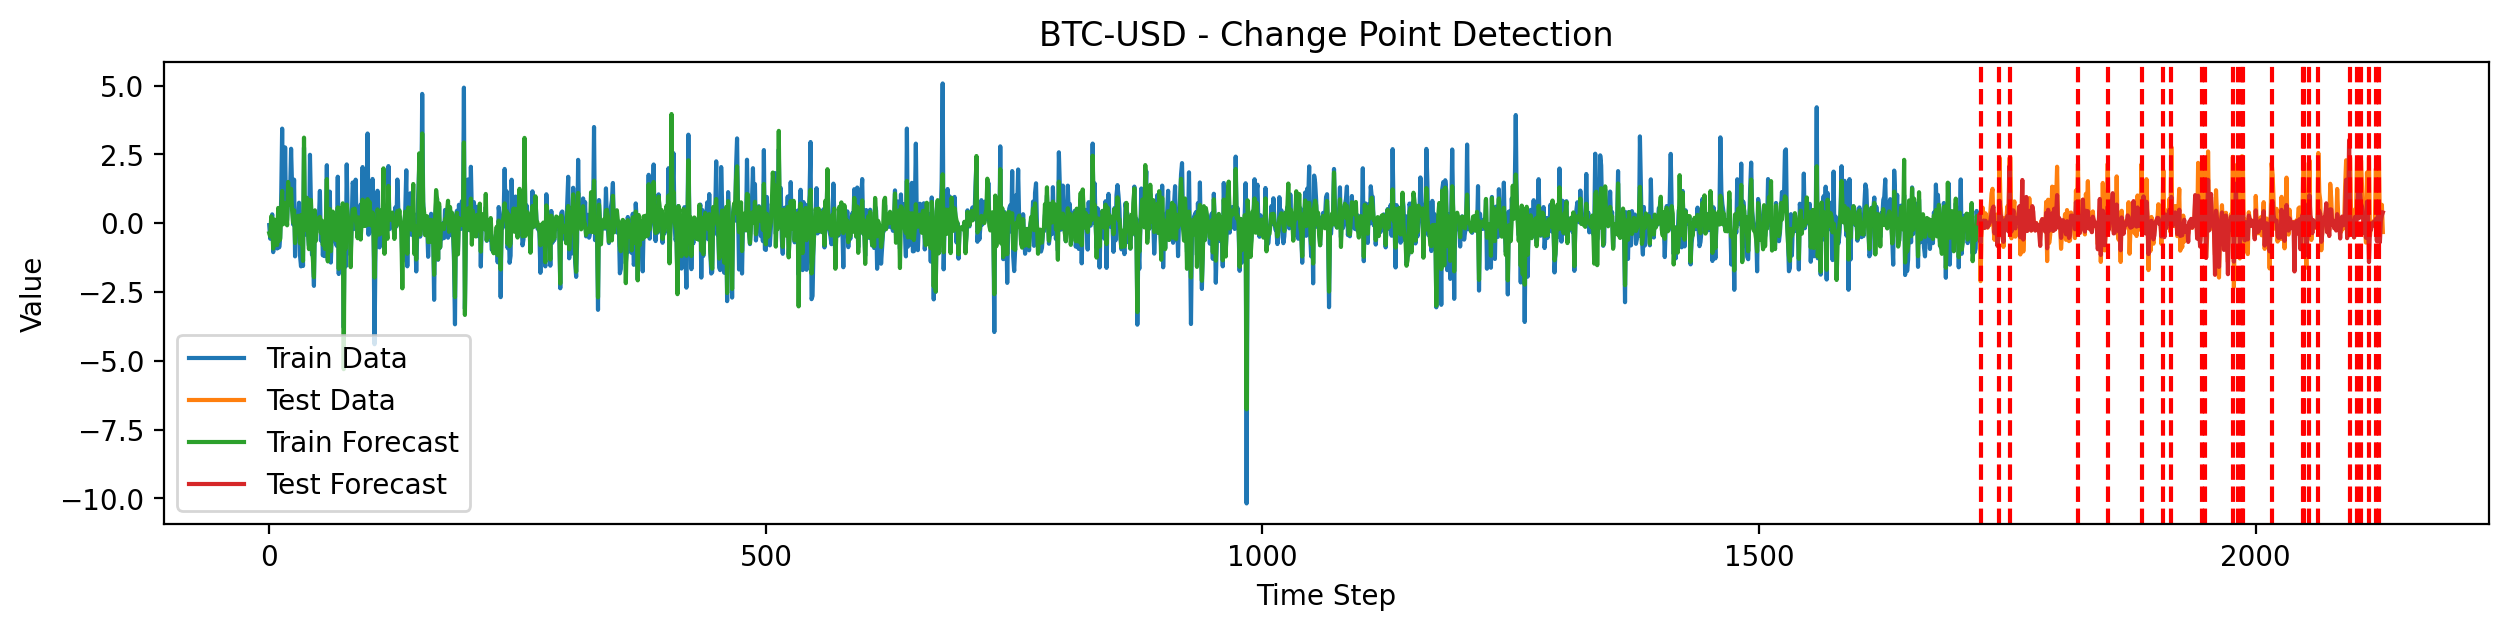

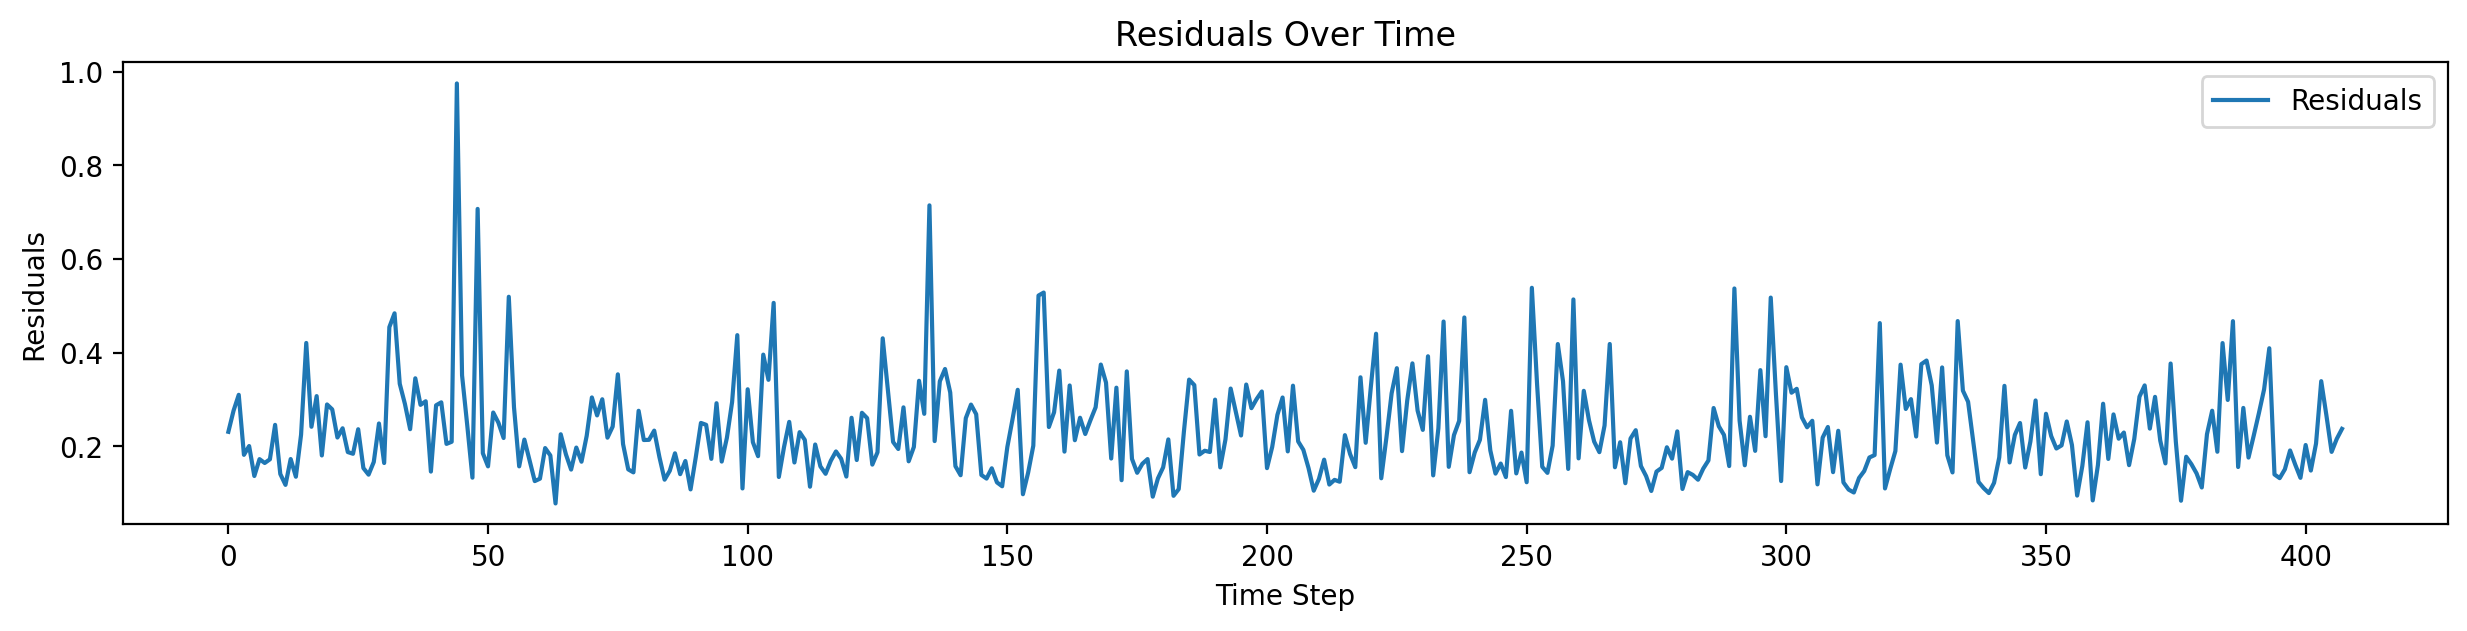

In [149]:
detector = ChangePointDetector('returns_crypto.csv', 'graphs_cor_', 'graph_prefix', graph_type='correlation')
detector.train_model()
change_points, residuals_list = detector.detect_change_points()
detector.plot_individual_series(change_points, 'BTC-USD')
detector.plot_residuals(residuals_list, change_points)

**Как видим на основе выбранных параметрах модели кол-во детектированных точек разладки больше для графа, который построен на основе энтропии**